## Signaux Continus Classiques

Certains signaux (on se limite ici aux signaux à une dimension) sont fondamentaux dans le domaine du [traitement du signal](https://fr.wikipedia.org/wiki/Traitement_du_signal). Ils sont particulièrement intéressants pour décrire les signaux intervenant dans les systèmes Linéaires Invariants dans le Temps (LTI : Linear Time Invariant). Ce Notebook est un complément aux transparents de la section I du cours.

### L'exponentielle complexe

L'exponentielle complexe est définie par : 

\begin{equation}
x(t) = e^{s t} 
\end{equation}

où  $s = \sigma + \imath \omega$ avec $t, \sigma, \omega \in \mathbb{R}$ où $t$ représente généralement le temps et $\imath = \sqrt{-1}$. La variable $\sigma$ peut être interprétée comme étant un amortissement et $\omega$ comme étant la pulsation de l'exponentielle complexe (on reviendra sur cette notion dans la partie numéirque).  En utilisant la [formule d'Euler](https://fr.wikipedia.org/wiki/Formule_d%27Euler), on peut réécrire $x(t)$ : 

\begin{equation}
x(t) = e^{(\sigma + \imath \omega) t} = e^{\sigma t} [\cos(\omega t) + \imath  \sin(\omega t)]
\end{equation}

Les parties réelle et imaginaire de $x(t)$ sont des sinusoïdes de pulsation $\omega = 2 \pi f$ dont l'amplitude est multipliée par $e^{\sigma t}$. Ce facteur multiplicatif, pour $t>0$, est 

* exponentiellement décroissant en fonction du temps pour  $\sigma < 0$,
* constant pour $\sigma = 0$,
* exponentiellement décroissant en fonction du temps pour  $\sigma > 0$,

Dans la suite de ce cours, on utilisera principalement $x(t) = e^{ \imath \omega t} $ pour permettre de faire une analyse harmonique du signal.

**Exemple**

Ci-dessous un exemple fabriqué avec Python : la partie réelle et imaginaire sont affichées, vous pouvez faire varier $\sigma$ et 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)


In [2]:
real_expo = lambda sigma,t: np.exp(sigma*t)
complex_sin = lambda omega,t: np.exp(1j*omega*t)
t=np.arange(0,10,0.01)
def ShowCplxExp(real_expo,complex_sin, t, sigma, omega):
    plt.gcf().clear()
    plt.subplot(211)
    plt.plot(t, real_expo(sigma,t)*np.real(complex_sin(omega,t)))
    plt.title('partie réelle')
    plt.xlabel(r'$t$');plt.ylabel(r'$e^{\sigma t} \cos(\omega t)$')
    plt.subplot(212)
    plt.title('partie imaginaire')
    plt.ylabel(r'$e^{\sigma t} \sin(\omega t)$')
    plt.plot(t, real_expo(sigma,t)*np.imag(complex_sin(omega,t)))
    plt.show()
    
plt.figure()
interact(lambda sigma,omega: ShowCplxExp(real_expo,complex_sin,t,sigma,omega),sigma=(-0.5,0.5,0.1),omega=(0,10,0.1))


A Jupyter Widget

<function __main__.<lambda>>

### La distribution de Dirac

La [distribution de Dirac](https://fr.wikipedia.org/wiki/Distribution_de_Dirac) (parfois appelée fonction $\delta(t)$ de Dirac, ou impulsion de Dirac), joue un rôle fondamental dans la description des sysètme LTI, en particulier pour le passage des systèmes à temps continu vers les système à temps discret. Cette distribution peut être considérée comme étant une généralisation d'une fonction, mais sa définition théorique sort du cadre de ce cours.  

On peut considérer que 
<ol>
<li>  $$\delta(t=0) = \infty$$</li>
<li>  $$\delta(t\not=0) = \infty$$</li>
<li>  $$\int_{-\infty}^{\infty} \delta(t) dt = 1$$</li>

</ol>


En particulier, on peut définir $\delta(t)$ de la façon suivante, soit la fonction porte :
$$\Pi_{T}(t) = \left\{\begin{array}{ll} 
1 \qquad & |t| \leq  \frac{T}{2} \\
 0 & |t| >   \frac{T}{2} 
\end{array}
\right.$$

On définit 
$$ \delta(t) = \lim_{a \rightarrow 0} \frac{1}{a} \Pi_a(t)$$

### Exemple
L'exemple ci-dessous vous permet de "voir" la limite vers "un Dirac".  Vous pouvez constater que la surface est constante, mais que la valeur maximum tend vers l'infini.

Text(0.5,1,'Portes pour $a$ variant de 0.01 (en bleu) à 0.5')

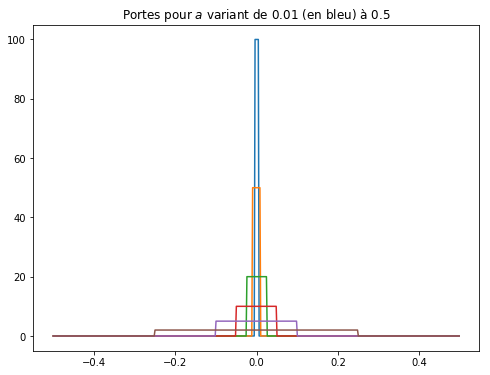

In [3]:
a_porte = lambda a: 1/a*((np.abs(t)<(a/2)))
t=np.arange(-0.5,0.5,0.002)
plt.plot(t,a_porte(0.01))
plt.plot(t,a_porte(0.02))
plt.plot(t,a_porte(0.05))
plt.plot(t,a_porte(0.1))
plt.plot(t,a_porte(0.2))
plt.plot(t,a_porte(0.5))
plt.title('Portes pour $a$ variant de 0.01 (en bleu) à 0.5')

In [4]:

def ShowPorte(fig,a_porte, t, a):
    plt.plot(t, a_porte(a))
    plt.title('Tend vers un dirac si $a \Rightarrow 0$')
    plt.xlabel(r'$t$');plt.ylabel(r'$1/a \Pi_a(t)$')
    plt.ylim(0,105)
    plt.show()
fig=plt.figure()
interact(lambda a: ShowPorte(fig,a_porte,np.arange(-0.5,0.5,0.002),a),a=(0.01,0.5,0.01))


A Jupyter Widget

<function __main__.<lambda>>



1. **Propriété de sélection **
    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    où $x(t)$ est differentiable à $t=0$. 
    
2. **Multiplication**
    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    où $x(t)$ est differentiable à $t=0$. 
    
3. **Linéarité**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
4. **Mise à l'échelle**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}
    où  $a \in \mathbb{R} \setminus 0$. La distribution de Dirac a donc une symétrie paire.
    
5. **Dérivation**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

Notez que le produit $\delta(t) \cdot \delta(t)$ de deux Dirac n'est pas définie.

### Echelon unité (fonction de Heaviside)

L'[échelon unité est défini](https://fr.wikipedia.org/wiki/Fonction_de_Heaviside) par 

\begin{equation}
H(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
\end{equation}

La valeur en $t=0$ est parfois notée $a$ ($a = \frac{1}{2}$ ci-dessus), et on note l'échelon par $H_a(t)$ (ici $H_{\frac{1}{2}}(t)$).



**Relation entre échelon et impulsion de Dirac**

La dérivée (au sens des distributions) de la fonction de Heaviside est la distribution de Dirac.  De façon inverse, on a que l'intégrale d'une distribution de Dirac est la fonction de Heaviside.  Par abus de notation, on peut écrire :


\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = H(t)
\end{equation}

**Exemple**

Les figures suivantes tracent la fonction de Heaviside, ainsi qu'une sinusoide multipliée par la fonction de Heaviside.

Text(0,0.5,'$H_{a}(t)*\\sin(2 \\pi f)$')

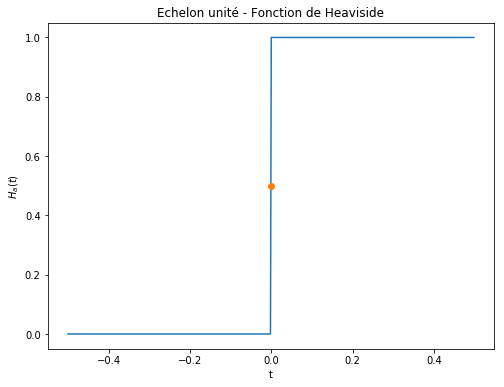

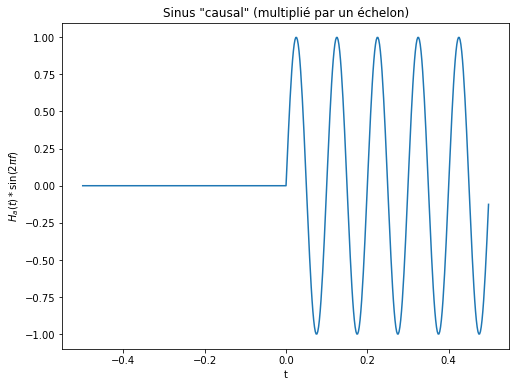

In [5]:
a=0.5
plt.plot(t,np.heaviside(t, a))
plt.plot(0,a,'o')
plt.title('Echelon unité - Fonction de Heaviside')
plt.xlabel('t')
plt.ylabel('$H_{a}(t)$')

plt.figure()
f=10
plt.plot(t,np.heaviside(t,a)*np.sin(t*2*np.pi*f))
plt.title('Sinus "causal" (multiplié par un échelon)')
plt.xlabel('t')
plt.ylabel('$H_{a}(t)*\sin(2 \pi f)$')

### Fonction Porte (signal rectangulaire)

La [fonction porte](https://f.wikipedia.org/wiki/Fonction_porte) (ou signal rectangulaire) 
est défini par :
$$\Pi(t) = \left\{\begin{array}{ll} 
1 \qquad & |t| \leq  \frac{1}{2} \\
 0 & |t| >   \frac{1}{2} 
\end{array}
\right.$$



On peut exprimer cette fonction porte en fonction de l'échelon de Heaviside :

\begin{equation}
\Pi(t) = H_1(t + \frac{1}{2}) - H_1(t - \frac{1}{2})
\end{equation}

On définit une porte "de largeur $T$" comme étant :


$$\Pi_{T}(t) = \left\{\begin{array}{ll} 
1 \qquad & |t| \leq  \frac{T}{2} \\
 0 & |t| >   \frac{T}{2} 
\end{array}
\right.$$

On remarquera que $\Pi_T(t) = \Pi(\frac{t}{T})$.

**Exemple**

Fonction porte de largeur $T = 0.4$

Text(0,0.5,'$\\Pi_{T}(t)$')

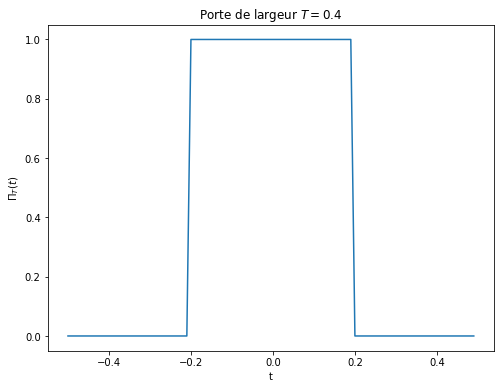

In [6]:
porte = lambda t,T: np.heaviside(t/T+1/2,1)-np.heaviside(t/T-1/2,1)
    

T=0.4;
t=np.arange(-0.5,0.5,0.01)
plt.plot(t,porte(t,T))
plt.title('Porte de largeur $T = 0.4$')
plt.xlabel('t')
plt.ylabel('$\Pi_{T}(t)$')

### Le signal "sign"

Le signal "sign" est défini par la  [fonction signe](https://fr.wikipedia.org/wiki/Fonction_signe) qui évalue le signe de son argument :

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

En particulier, on peut exprimer la valeur absolue de  $x(t) \in \mathbb{R}$ par : 

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

Ce signal est relié à l'échelon de Heaviside par 

\begin{equation}
\text{sgn}(t) = 2 \cdot H(t) - 1
\end{equation}

**Exemple**



Text(0.5,1,'Signal signe')

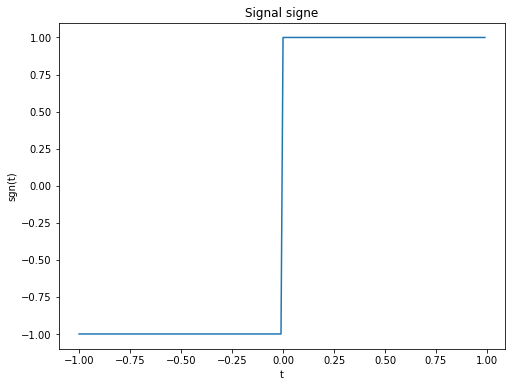

In [7]:
t=np.arange(-1,1,0.01)
plt.plot(t,np.sign(t))
plt.xlabel('t')
plt.ylabel('sgn(t)')
plt.title("Signal signe")

## Opérations courantes sur les signaux

### Superposition

Soient deux signaux à valeurs réelles (ou complexes) $x_1(t)$ et $x_2(t)$, on peut définir la superpostion de ces signaux par :

$$y(t) = a x_1(t) + b x_2(t) ,$$

où $a$ et $b$ sont deux constantes réelles (ou complexes).

Text(0.5,0,'t')

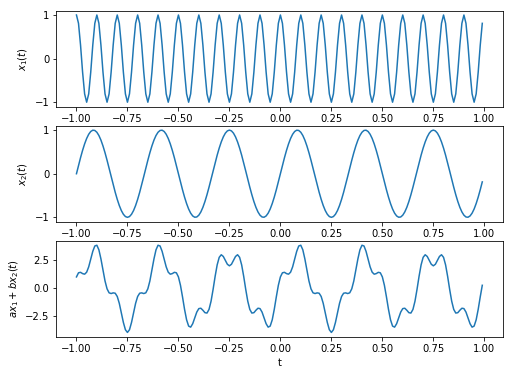

In [8]:
t=np.arange(-1,1,0.01)
x1=np.cos(t*2*np.pi*10)
x2=np.sin(t*2*np.pi*3)
a=1
b=3

plt.subplot(311)
plt.plot(t,x1);plt.ylabel('$x_1(t)$');plt.xlabel('t')

plt.subplot(312)
plt.plot(t,x2);plt.ylabel('$x_2(t)$');plt.xlabel('t')

plt.subplot(313)
plt.plot(t,a*x1+b*x2);plt.ylabel('$a x_1+ b x_2(t)$');plt.xlabel('t')


## Décalage temporel (et déphasage)

On utilise très souvent le décalage temporel, par exemple $y(t) = x(t-\tau)$.  Le signal $y(t)$ est le signal $x(t)$ retardé d'un temps $\tau$.

Notez, dans la deuxième figure, que si $x(t)$ est un signal sinusoïdal (de durée infinie), le décalage temporel revient à un ddéphasage. 

Question subsidiaire : pour ce signal, le décalage de $\tau = 0.4$ semble être seulement le double du décalage de $\tau = 0.03$ ... comment se fait-ce ?


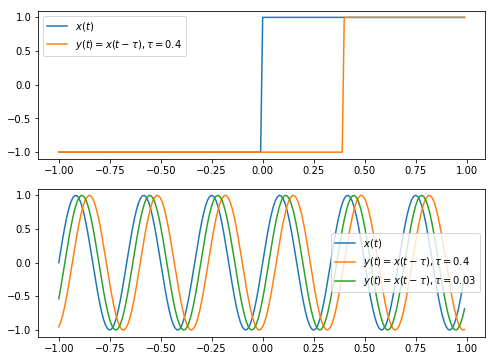

In [9]:
t=np.arange(-1,1,0.01)
tau=0.4
x=np.sign(t)
y=np.sign(t-tau)

plt.subplot(211)
plt.plot(t,x,label=r'$x(t)$')
plt.plot(t,y,label=r'$y(t) = x(t-\tau), \tau=0.4$')
plt.legend()

plt.subplot(212)
x=np.sin(t*2*np.pi*3)
y=np.sin((t-tau)*2*np.pi*3)
y2=np.sin((t-0.03)*2*np.pi*3)

plt.plot(t,x,label=r'$x(t)$')
plt.plot(t,y,label=r'$y(t) = x(t-\tau), \tau=0.4$')
plt.plot(t,y2,label=r'$y(t) = x(t-\tau), \tau=0.03$')

plt.legend()


## Dilatation - contraction

L'opération de dilatation consiste à "étirer" un signal dans le temps :

$$ y(t) = x(a.t)$$

où $a$ est une constante scritement positive.

Si $a$ > 1, on a une contraction,
Si $a$ < 1, on a une dilatation.


In [10]:
t=np.arange(-1,2,0.01)
x = lambda t: np.sign(t)+2*np.sign(t-0.2)+3*np.sign(t-0.3)-6*np.sign(t-0.5)

def ShowDilat(x, t, a):
    plt.plot(t, x(t),label="$x(t)$")
    plt.plot(t,x(a*t),label="$x(a.t)$")
    plt.title('Un signal et son signal dilaté')
    plt.xlabel(r'$t$')
    plt.legend()
    plt.show()
fig=plt.figure()
interact(lambda a: ShowDilat(x,t,a),a=(0,2,0.1))


A Jupyter Widget

<function __main__.<lambda>>

## Retournement temporel

L'opération de dilatation consiste à "renverser" un signal dans le temps.  Cette opération est très utilisée en traitement de signal, même si elle transforme un signal causal (non nul uniquement pour $t\geq 0$) en un signal anti-causal (non nul uniquement pour $t\leq 0$)

$$ y(t) = x(-t)$$

Notez qu'on peut combiner ce retournement temporel avec une dilatation contraction :
$$ y(t) = x(-a.t)$$

où $a$ est une constante scritement positive.

Si $a$ > 1, on a une contraction (et un retournement temporel),
Si $a$ < 1, on a une dilatation (et un retournement temporel).

On peut également combiner cette opération avec un décalage temporel.

L'animation ci-dessous illustre la combinaison de ces trois opérations.


In [17]:
t=np.arange(-2,2,0.01)
x = lambda t: np.sign(t)+2*np.sign(t-0.2)+3*np.sign(t-0.3)-6*np.sign(t-0.5)

def ShowDilat(x, t,tau, a):
    plt.plot(t, x(t),label="$x(t)$")
    plt.plot(t,x(a*t-tau),label="$x(a.t)$")
    plt.title('Un signal et son signal dilaté')
    plt.xlabel(r'$t$')
    plt.legend()
    plt.show()
fig=plt.figure()
interact(lambda a,tau: ShowDilat(x,t,tau,a),a=(-2,4,0.1),tau=(-1,1,0.1))


A Jupyter Widget

<function __main__.<lambda>>